 # Creating a simple Power Spectrum using 21cmFAST
    
The purpose of this notebook is to describe how to create a simulated power spectrum using 21cmFAST

In [4]:
#The first step is to import the necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c
from powerbox.tools import get_power

To create a power spectrum, you first need to create a coeval cube. The value for redshift is required for the `run_coeval` function to work. Other parameters can be included but are not necessary to specify. 

Here, a redshift of 8.0 is selected. The other parameters input here are:

* User Parameters: `"HII_DIM"` is the number of cells for the low-res box; `"BOX_LEN"` is the length of the box, in Mpc.

* Cosmological Parameters: `"SIGMA_8"` is the RMS mass variance (power spectrum normalisation).

* Astrophysical Parameters: `"HII_EFF_FACTOR"` is the ionizing efficiency of high-z galaxies (zeta, from Eq. 2 of Greig+2015). Higher values tend to speed up reionization.

Lastly, a random seed is passed. This sets all the random phases for the simulation, and ensures that we can exactly reproduce the same results on every run.

In [2]:
coeval8 = p21c.run_coeval(
    redshift = 8.0,
    user_params = {"HII_DIM": 100, "BOX_LEN": 100},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":20.0}),
    random_seed = 12345
)

Finally, we plot the power spectrum itself. To do this, we assign the brightness temperture calculated above and the box length to the variables `power` and `k`. Then we do a simple `loglog` plot. The equation for the power spectrum is
$ power \times k ^ 3 / (2 \times \pi ^ 2) $

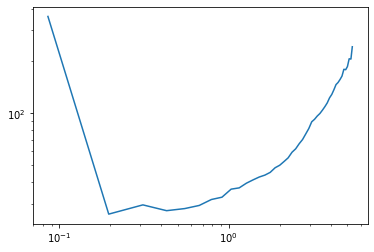

In [3]:
power, k = get_power(coeval8.brightness_temp, coeval8.user_params.BOX_LEN)
plt.loglog(k, power * k ** 3 / (2 * np.pi ** 2))